# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [197]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [198]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [199]:
# Read the census data into a Pandas DataFrame
sfo = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(sfo, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [200]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_average_house_unit = sfo_data.groupby('year')['housing_units'].mean()
sfo_average_house_unit

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [196]:
# Save the dataframe as a csv file
df = pd.DataFrame(sfo_average_house_unit)
  
# saving the dataframe
df.to_csv('house2.csv')

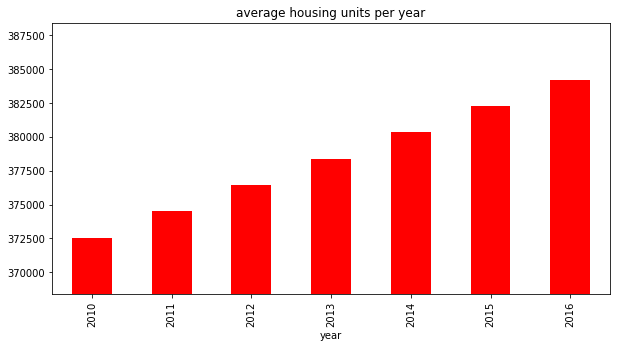

In [148]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_average_house_unit.plot.bar(figsize=(10,5))
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
min = sfo_average_house_unit.min()
max = sfo_average_house_unit.max()
std = sfo_average_house_unit.std()
sfo_average_house_unit.plot.bar(ylim = (min-std, max+std), title = 'average housing units per year',figsize=(10,5), color = 'red'  )

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [149]:
# Calculate the average sale price per square foot 
sfo_average_both = sfo_data.groupby('year')['sale_price_sqr_foot', 'gross_rent' ].mean()
sfo_average_both

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


In [150]:
#Calculate the average sale price per square foot
sfo_average_sale = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
sfo_average_sale

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [151]:
# Calculate the average gross rent
sfo_average_rent = sfo_data.groupby('year')['gross_rent'].mean()
sfo_average_rent

year
2010    1239.0
2011    1530.0
2012    2324.0
2013    2971.0
2014    3528.0
2015    3739.0
2016    4390.0
Name: gross_rent, dtype: float64

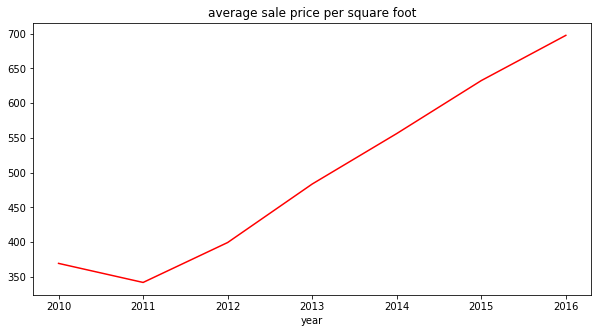

In [251]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sfo_average_sale.plot.line(title = "average sale price per square foot",figsize=(10,5), color = 'red')


- - - 

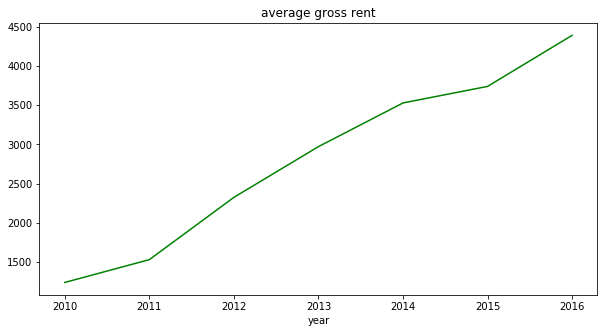

In [252]:
# Line chart for average montly rent
sfo_average_rent.plot.line(title = 'average gross rent',figsize=(10,5), color = 'green')

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [185]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# apb = average prece by
sfo_apb_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index().round(2)
sfo_apb_neighborhood

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.18,372560.0,1239.0
1,2010,Anza Vista,267.93,372560.0,1239.0
2,2010,Bayview,170.10,372560.0,1239.0
3,2010,Buena Vista Park,347.39,372560.0,1239.0
4,2010,Central Richmond,319.03,372560.0,1239.0
...,...,...,...,...,...
392,2016,Telegraph Hill,903.05,384242.0,4390.0
393,2016,Twin Peaks,970.09,384242.0,4390.0
394,2016,Van Ness/ Civic Center,552.60,384242.0,4390.0
395,2016,Visitacion Valley,328.32,384242.0,4390.0


In [263]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_apb_neighborhood.hvplot.line(x='year',y='sale_price_sqr_foot',groupby='neighborhood', color = "orange")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [245]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_apb_neighborhood.hvplot.line(x='year',y='gross_rent',groupby='neighborhood', color = "green")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [50]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_apb_neighborhood10 = sfo_data.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot',ascending=False).reset_index().round(2)
sfo_apb_neighborhood10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.99,377427.50,2555.17
1,Merced Heights,788.84,380348.00,3414.00
2,Miraloma Park,779.81,375967.25,2155.25
3,Pacific Heights,689.56,378401.00,2817.29
4,Westwood Park,687.09,382295.00,3959.00
...,...,...,...,...
68,Visitacion Valley,301.47,381321.50,3657.00
69,Outer Mission,242.37,379374.50,2995.75
70,Bayview,204.59,376454.00,2318.40
71,Hunters Point,170.62,377427.50,2489.00


In [54]:
#top ten 
top_ten = sfo_apb_neighborhood10.iloc[:10]
top_ten

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.99,377427.50,2555.17
1,Merced Heights,788.84,380348.00,3414.00
2,Miraloma Park,779.81,375967.25,2155.25
3,Pacific Heights,689.56,378401.00,2817.29
4,Westwood Park,687.09,382295.00,3959.00
5,Telegraph Hill,676.51,378401.00,2817.29
6,Presidio Heights,675.35,378401.00,2817.29
7,Cow Hollow,665.96,378401.00,2817.29
8,Potrero Hill,662.01,378401.00,2817.29
9,South Beach,650.12,375805.00,2099.00


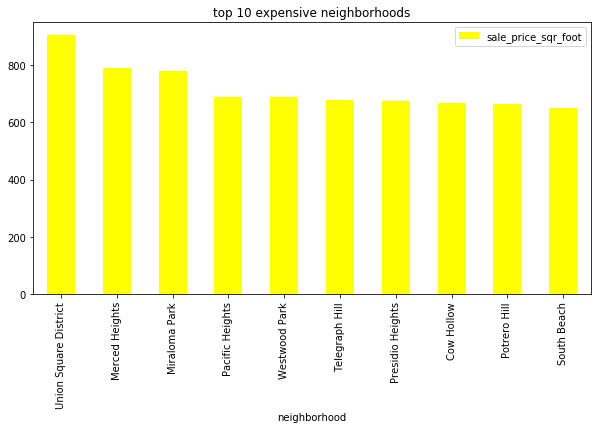

In [57]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten.plot.bar(x = 'neighborhood', y = 'sale_price_sqr_foot', title = "top 10 expensive neighborhoods",figsize=(10,5), color = 'yellow')

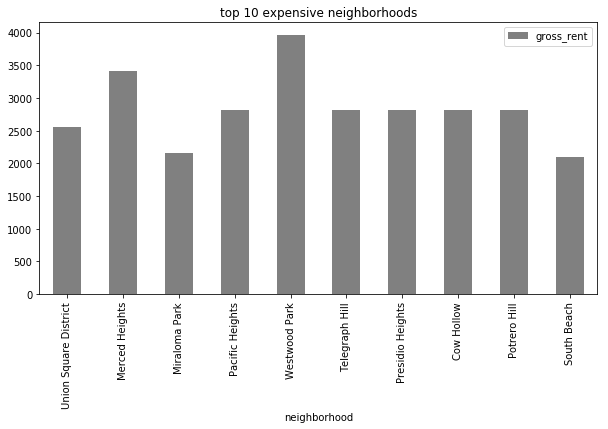

In [222]:
# Getting the data from the top 10 expensive neighborhoods to own bt average gross rent
sfo_apb_neighborhood_rent = sfo_data.groupby(["neighborhood"]).mean().sort_values('gross_rent',ascending=False).reset_index().round(2)
top_ten.plot.bar(x = 'neighborhood', y = 'gross_rent', title = "top 10 expensive neighborhoods",figsize=(10,5), color = 'grey')

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [343]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_apb_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index().round(2).iloc[:10]
sfo_apb_neighborhood.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.18,372560.0,1239.0
1,2010,Anza Vista,267.93,372560.0,1239.0
2,2010,Bayview,170.10,372560.0,1239.0
3,2010,Buena Vista Park,347.39,372560.0,1239.0
4,2010,Central Richmond,319.03,372560.0,1239.0


In [260]:
sfo_apb_neighborhood_ave = sfo_data[["sale_price_sqr_foot","neighborhood"]]
sfo_apb_neighborhood10 = sfo_apb_neighborhood_ave.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot',ascending=False).round(2).iloc[:10]

sfo_apb_neighborhood10




,sale_price_sqr_foot
neighborhood,
Union Square District,903.99
Merced Heights,788.84
Miraloma Park,779.81
Pacific Heights,689.56
Westwood Park,687.09
Telegraph Hill,676.51
Presidio Heights,675.35
Cow Hollow,665.96
Potrero Hill,662.01


In [334]:
sfo_apb_neighborhood_rent = sfo_data[["gross_rent","neighborhood"]]
sfo_apb_neighborhoodrent = sfo_apb_neighborhood_rent.groupby(["neighborhood"]).mean().sort_values('gross_rent',ascending=False).round(2).iloc[:10]

sfo_apb_neighborhoodrent = sfo_apb_neighborhoodrent.reset_index()
sfo_apb_neighborhoodrent

,neighborhood,gross_rent
0,Westwood Park,3959.00
1,Bayview Heights,3739.00
2,Visitacion Valley,3657.00
3,Silver Terrace,3528.00
4,Merced Heights,3414.00
5,Inner Parkside,3224.00
6,Mission Terrace,3173.40
7,Bernal Heights,3080.33
8,Anza Vista,3031.83
9,Excelsior,3031.83


In [342]:
# Plotting the data from the top 10 expensive neighborhoods

sfo_apb_neighborhood.hvplot.bar('year', ['gross_rent' , 'sale_price_sqr_foot'], groupby = 'neighborhood', color = 'orange', rot = 90 )


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [162]:
# Load neighborhoods coordinates data
coordinates = Path("neighborhoods_coordinates.csv")
coordinates_data = pd.read_csv(coordinates, index_col="Neighborhood")
coordinates_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [167]:
# Calculate the mean values for each neighborhood
sfo_apb_neighborhood = sfo_data.groupby([ "neighborhood"]).mean().reset_index().round(2)
sfo_apb_neighborhood.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.02,378401.0,2817.29
1,Anza Vista,373.38,379050.0,3031.83
2,Bayview,204.59,376454.0,2318.40
3,Bayview Heights,590.79,382295.0,3739.00
4,Bernal Heights,576.75,379374.5,3080.33


In [170]:
# dropping the neighborhood
sfo_apb_neighborhood_drop = sfo_data.groupby([ "neighborhood"]).mean().reset_index().round(2).drop(columns="neighborhood")
sfo_apb_neighborhood_drop.head()

,sale_price_sqr_foot,housing_units,gross_rent
0,366.02,378401.0,2817.29
1,373.38,379050.0,3031.83
2,204.59,376454.0,2318.40
3,590.79,382295.0,3739.00
4,576.75,379374.5,3080.33


In [138]:
# Calculate the mean values for each neighborhood
coordinates_average_data = coordinates_data.groupby([ "Neighborhood"]).mean().reset_index()
coordinates_average_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [188]:
# Join the average values with the neighborhood locations
join_sfo_coordinates= pd.concat([coordinates_average_data, sfo_apb_neighborhood_drop], axis="columns", join="inner")
join_sfo_coordinates.head()


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.02,378401.0,2817.29
1,Anza Vista,37.779598,-122.443451,373.38,379050.0,3031.83
2,Bayview,37.734670,-122.401060,204.59,376454.0,2318.40
3,Bayview Heights,37.728740,-122.410980,590.79,382295.0,3739.00
4,Bernal Heights,37.728630,-122.443050,576.75,379374.5,3080.33


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [327]:
# Set the mapbox access token
load_dotenv()
MapBox = os.getenv("MapBox")

# Create a scatter mapbox to analyze neighborhood info
# Plot Data
map_plot = px.scatter_mapbox(
    join_sfo_coordinates,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=5,
    hover_name = "Neighborhood",
    title ="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [315]:
# Fetch the data from all expensive neighborhoods per year.
top_most_expensive = sfo_data.groupby([sfo_data["neighborhood"]]).mean().nlargest(10, 'sale_price_sqr_foot').reset_index().round(2)
top_most_expensive

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.99,377427.50,2555.17
1,Merced Heights,788.84,380348.00,3414.00
2,Miraloma Park,779.81,375967.25,2155.25
3,Pacific Heights,689.56,378401.00,2817.29
4,Westwood Park,687.09,382295.00,3959.00
5,Telegraph Hill,676.51,378401.00,2817.29
6,Presidio Heights,675.35,378401.00,2817.29
7,Cow Hollow,665.96,378401.00,2817.29
8,Potrero Hill,662.01,378401.00,2817.29
9,South Beach,650.12,375805.00,2099.00


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


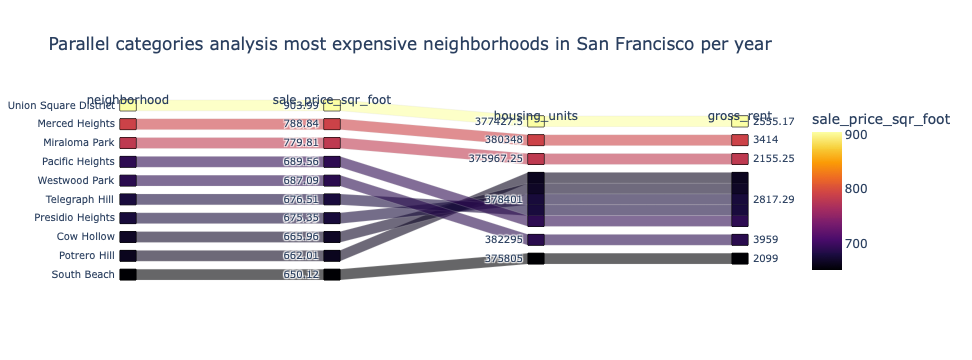

In [324]:
  # Parallel Categories Plot 
parallel_categories = px.parallel_categories(
    top_most_expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title ="Parallel categories analysis most expensive neighborhoods in San Francisco per year",
)
    
parallel_categories
   

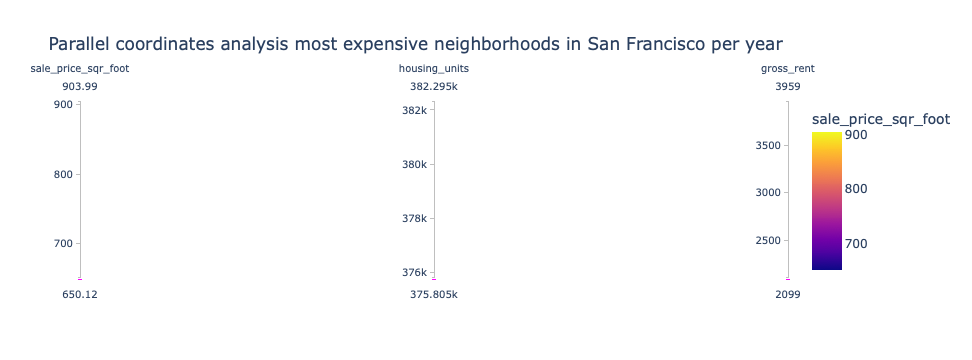

In [326]:
# Parallel Coordinates Plot
top_10_parallel_coordinates = px.parallel_coordinates(top_10_most_expensive, color='sale_price_sqr_foot', title = "Parallel coordinates analysis most expensive neighborhoods in San Francisco per year")
top_10_parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

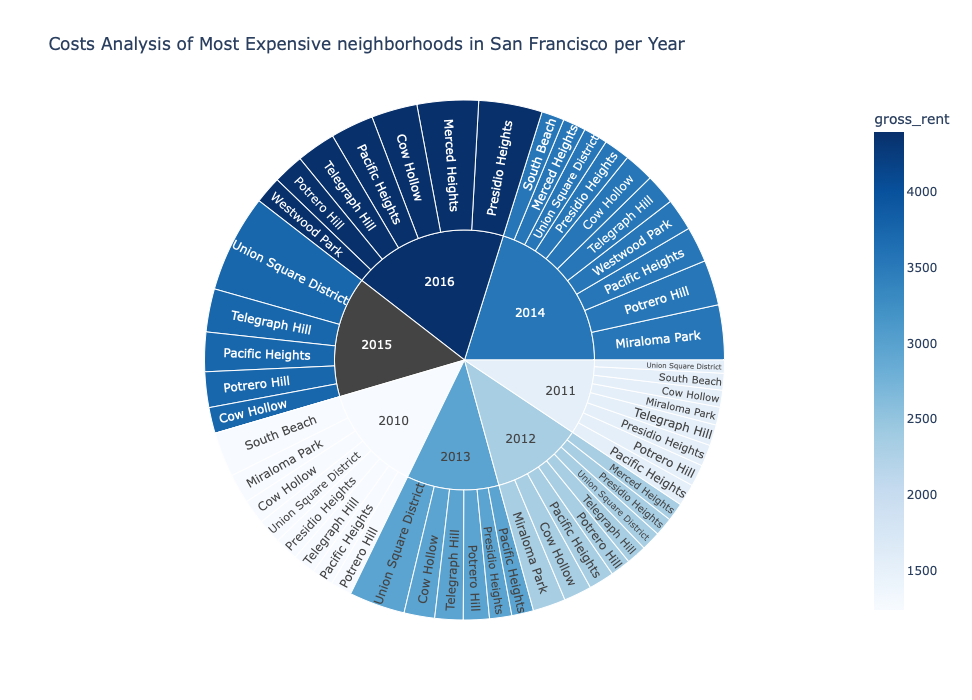

In [23]:
# Sunburst Plot
# YOUR CODE HERE!